In [ ]:
# Cell 1: Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Cell 2: Load CIFAR-10 Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


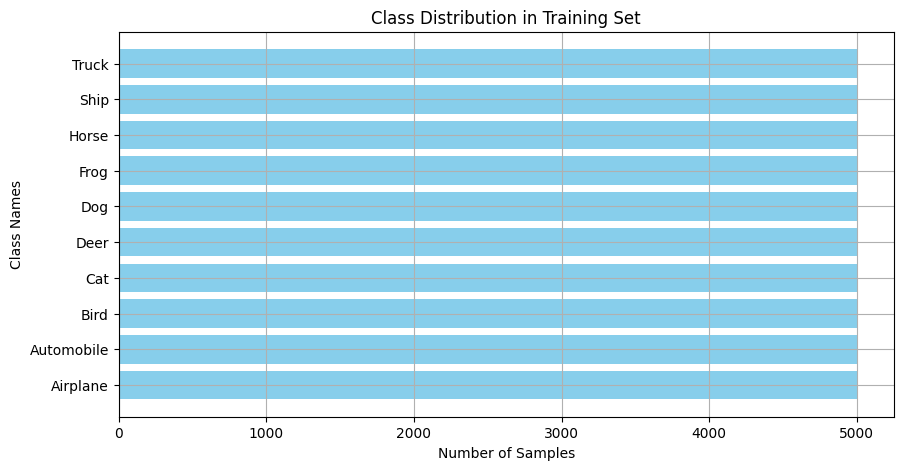

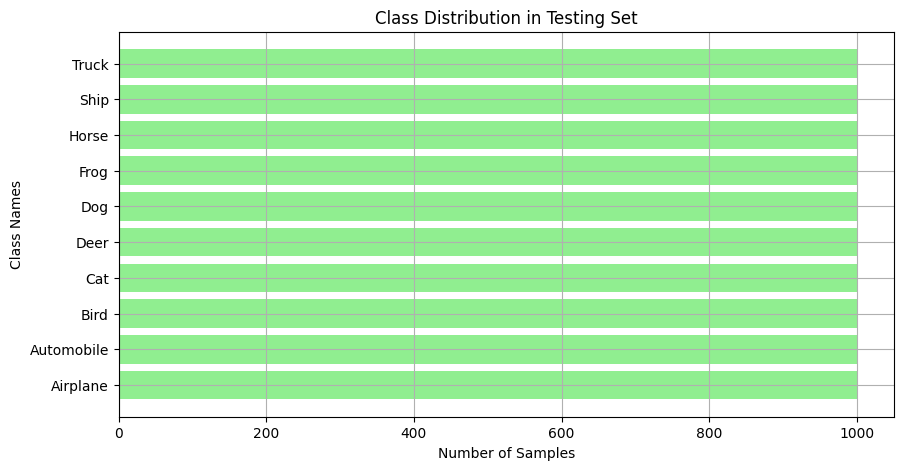

In [ ]:
# Class names
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert one-hot encoded labels to class indices
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Plot class distribution for training set
classes, counts = np.unique(y_train_classes, return_counts=True)
plt.figure(figsize=(10, 5))
plt.barh(classes_name, counts, color='skyblue')
plt.title('Class Distribution in Training Set')
plt.xlabel('Number of Samples')
plt.ylabel('Class Names')
plt.grid(True)
plt.show()

# Plot class distribution for testing set
classes, counts = np.unique(y_test_classes, return_counts=True)
plt.figure(figsize=(10, 5))
plt.barh(classes_name, counts, color='lightgreen')
plt.title('Class Distribution in Testing Set')
plt.xlabel('Number of Samples')
plt.ylabel('Class Names')
plt.grid(True)
plt.show()


In [ ]:
# Cell 3: Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)


In [ ]:
# Assuming y_cat_train should represent the one-hot encoded training labels,
# it should be assigned the value of y_train after one-hot encoding:
y_cat_train = to_categorical(y_train, num_classes=10) #  Assuming 10 classes for CIFAR-10

# Then you can access it:
y_cat_train

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0.

In [ ]:
# Cell 4: Model Architecture
model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'), # Added padding='same'
    MaxPool2D((2, 2)),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu', padding='same'), # Added padding='same'
    MaxPool2D((2, 2)),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu', padding='same'), # Added padding='same'
    MaxPool2D((2, 2)),

    # Fourth convolutional block
    Conv2D(256, (3, 3), activation='relu', padding='same'), # Added padding='same'

    # Global Average Pooling to reduce spatial dimensions to 1x1
    GlobalAveragePooling2D(),

    # Fully connected layer
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output layer with softmax activation
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Cell 5: Compile the Model
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [8]:
# Cell 6: Fit the Model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),  # Using data augmentation
    validation_data=(X_test, y_test),
    epochs=70,  # You can adjust epochs based on your needs
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/70


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.2248 - loss: 2.0283 - val_accuracy: 0.4176 - val_loss: 1.5948
Epoch 2/70
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.4054 - loss: 1.6013 - val_accuracy: 0.5009 - val_loss: 1.3443
Epoch 3/70
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.4805 - loss: 1.4319 - val_accuracy: 0.5393 - val_loss: 1.2771
Epoch 4/70
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5272 - loss: 1.3212 - val_accuracy: 0.5829 - val_loss: 1.1551
Epoch 5/70
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5585 - loss: 1.2381 - val_accuracy: 0.6206 - val_loss: 1.0605
Epoch 6/70
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5881 - loss: 1.1649 - val_accuracy: 0.6376 - val_loss: 1.0088
Epoch 7/70
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6116 - loss: 1.0975 - val_accuracy: 0.6634 - val_loss: 0.9388
Epoch 8/70
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6289 - loss: 1.0527 - val_accurac

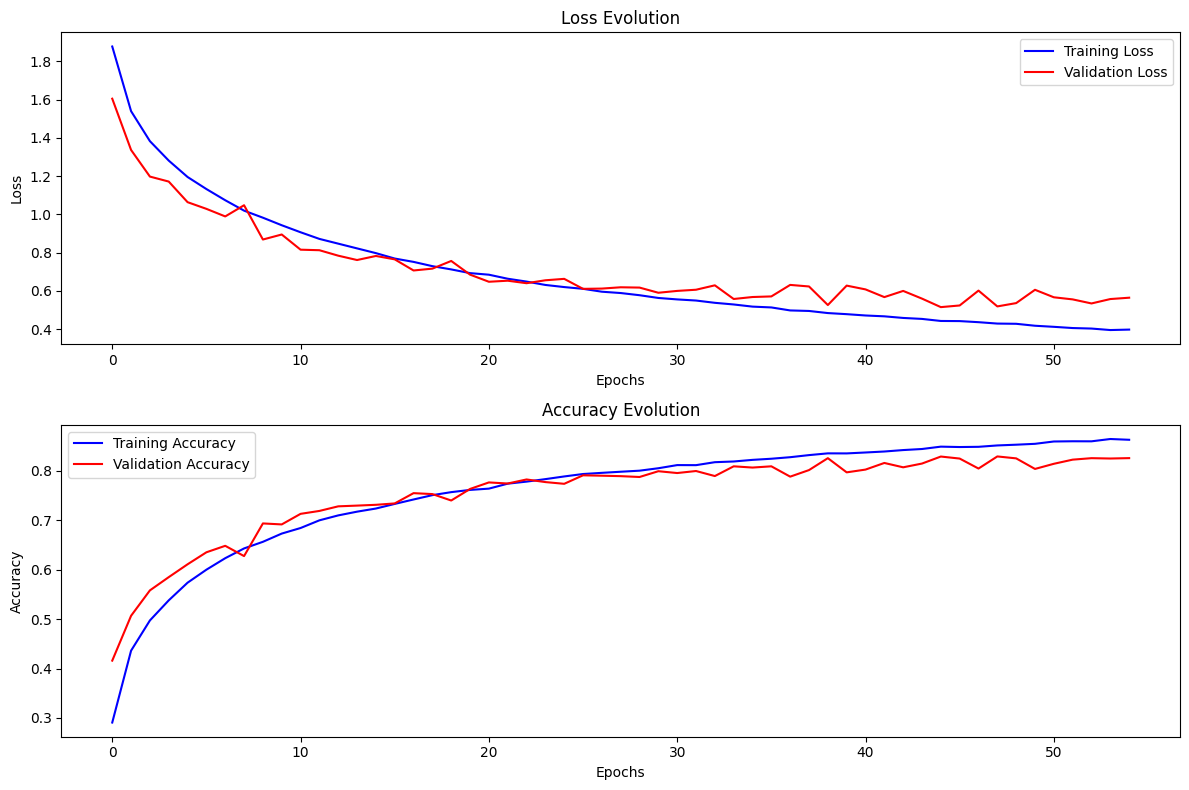

In [ ]:
# Plot Training and Validation Loss and Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot Loss Evolution
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot Accuracy Evolution
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.title('Accuracy Evolution')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

    Airplane       0.85      0.87      0.86      1000
  Automobile       0.91      0.93      0.92      1000
        Bird       0.81      0.77      0.79      1000
         Cat       0.69      0.66      0.68      1000
        Deer       0.86      0.72      0.78      1000
         Dog       0.76      0.77      0.76      1000
        Frog       0.82      0.90      0.85      1000
       Horse       0.81      0.89      0.85      1000
        Ship       0.93      0.88      0.90      1000
       Truck       0.86      0.91      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



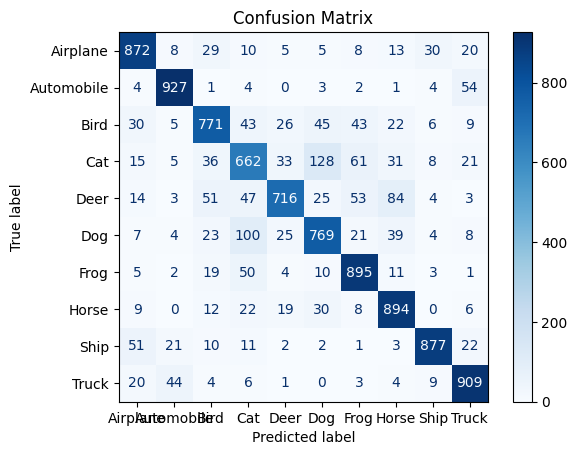

In [ ]:
# Cell 9: Classification Report and Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=classes_name))

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_name)
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


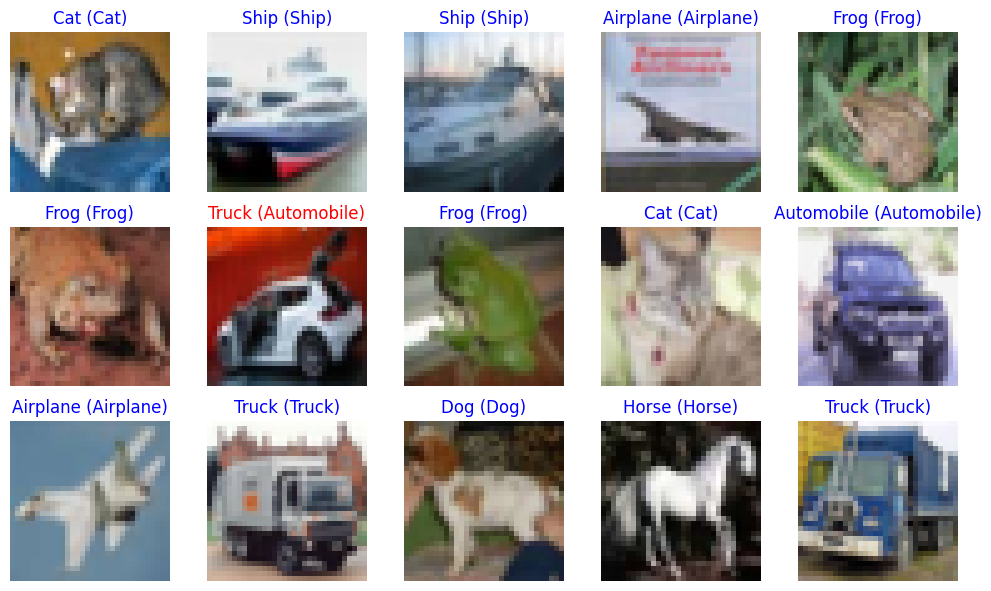

In [ ]:
# Define function to display images with predictions
def plot_predictions(images, predictions, true_labels, labels, num_rows=3, num_cols=5):
    plt.figure(figsize=(2 * num_cols, 2 * num_rows))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(true_labels[i])
        color = 'blue' if pred_label == true_label else 'red'
        plt.title(f"{labels[pred_label]} ({labels[true_label]})", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Assuming 'classes_name' from your previous code contains the labels
# Replace this with the actual variable containing your class labels if different
labels = classes_name

# Visualize sample predictions
plot_predictions(X_test[:15], y_pred[:15], y_test[:15], labels)

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.5149
Test Accuracy: 0.8292


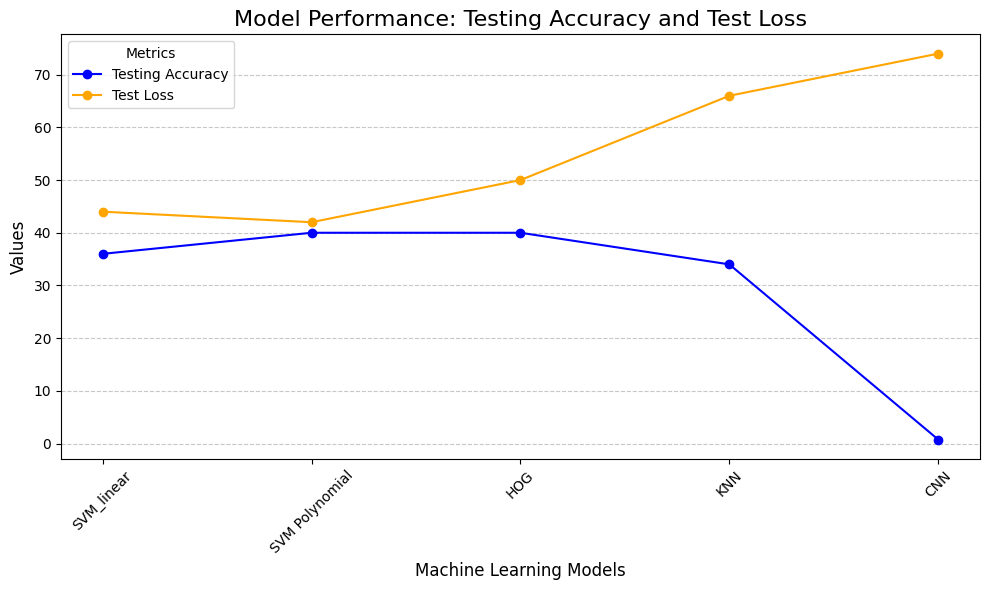

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Manually define the data based on your provided table
data = {
    "ml models": ["SVM_linear", "SVM Polynomial", "HOG", "KNN", "CNN"],
    "Testing Accuracy": [36, 40, 40, 34, 74.7],
    "Test Loss": [44, 42, 50, 66, 74],  # None for missing data
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(10, 6))

# Plot Testing Accuracy
plt.plot(df["ml models"], df["Testing Accuracy"], marker='o', label="Testing Accuracy", color='blue')

# Plot Test Loss
plt.plot(df["ml models"], df["Test Loss"], marker='o', label="Test Loss", color='orange')

# Customize the plot
plt.title("Model Performance: Testing Accuracy and Test Loss", fontsize=16)
plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend(title="Metrics", fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
